# **Introductory EDA on IMA Data**

Database created by the RRUFF Project in partnership with International Mineralogical Association (IMA). It contains a complete set of high quality spectral data from well characterized minerals. 

En el siguiente trabajo se muestran los procedimientos introductorios de EDA ejecutados para ingresar, leer, manipular y modificar los valores de datos presentes en la tabla.

Los objetivos son descubrir cuáles son los países con mayor cantidad de minerales, los elementos más abundante y de mayor antiguedad. Se emplearon las columnas Mineral, Country, Elements y Age (Ma).

**Results**

From IMA Data:

1. Countries with more minerals:
   * **United States of America: 825**
   * **Russia: 803**
   * **Italy: 370**
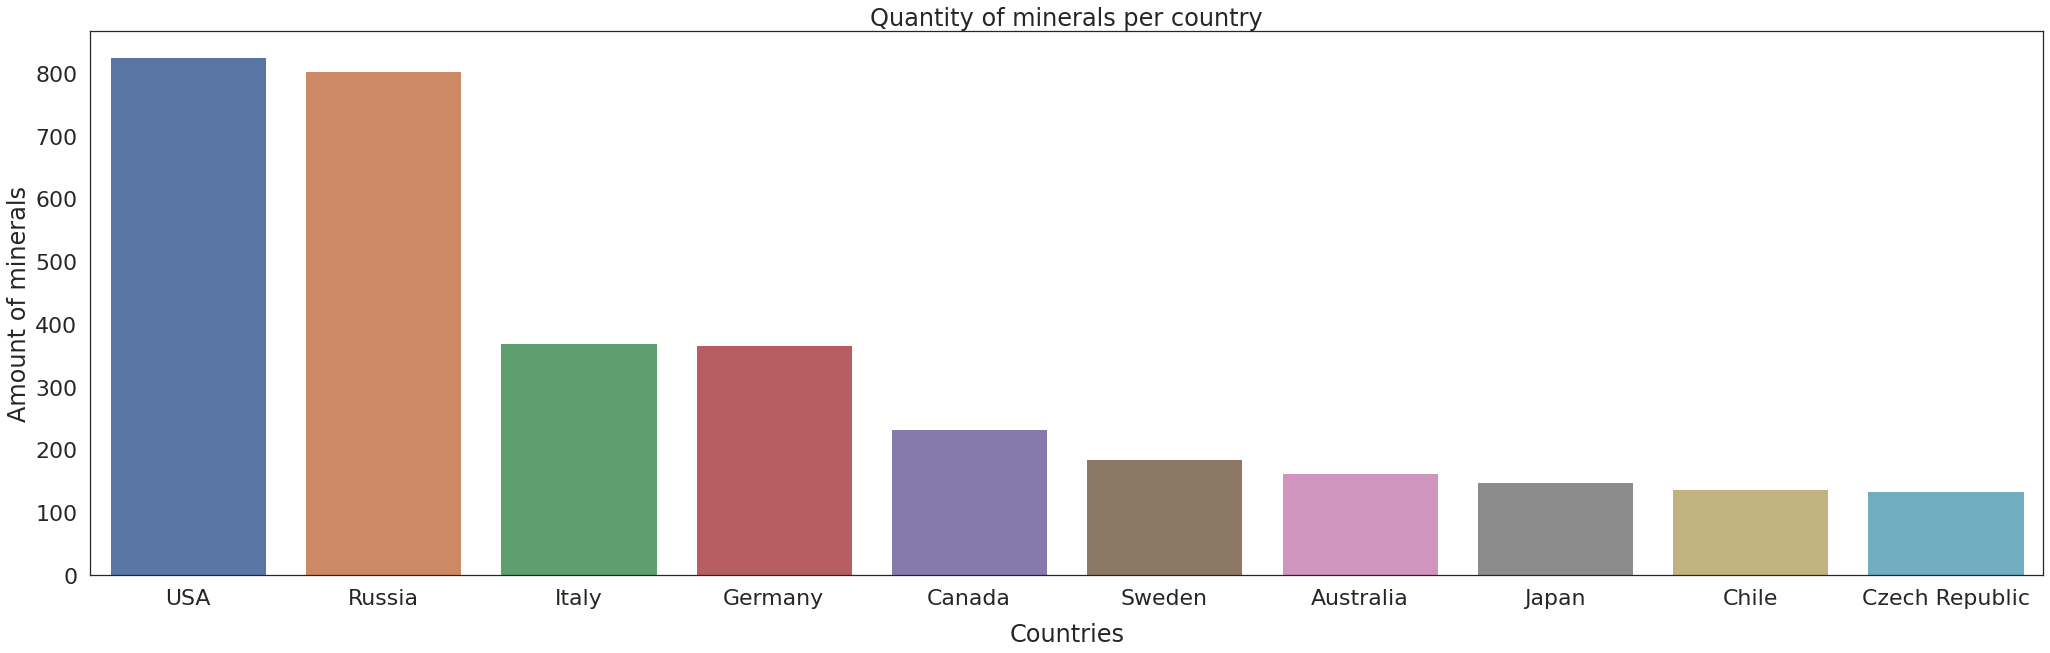

2. Most abundant chemistry elements:
    * **Oxygen**
    * **Hydrogen**
    * **Calcium**    
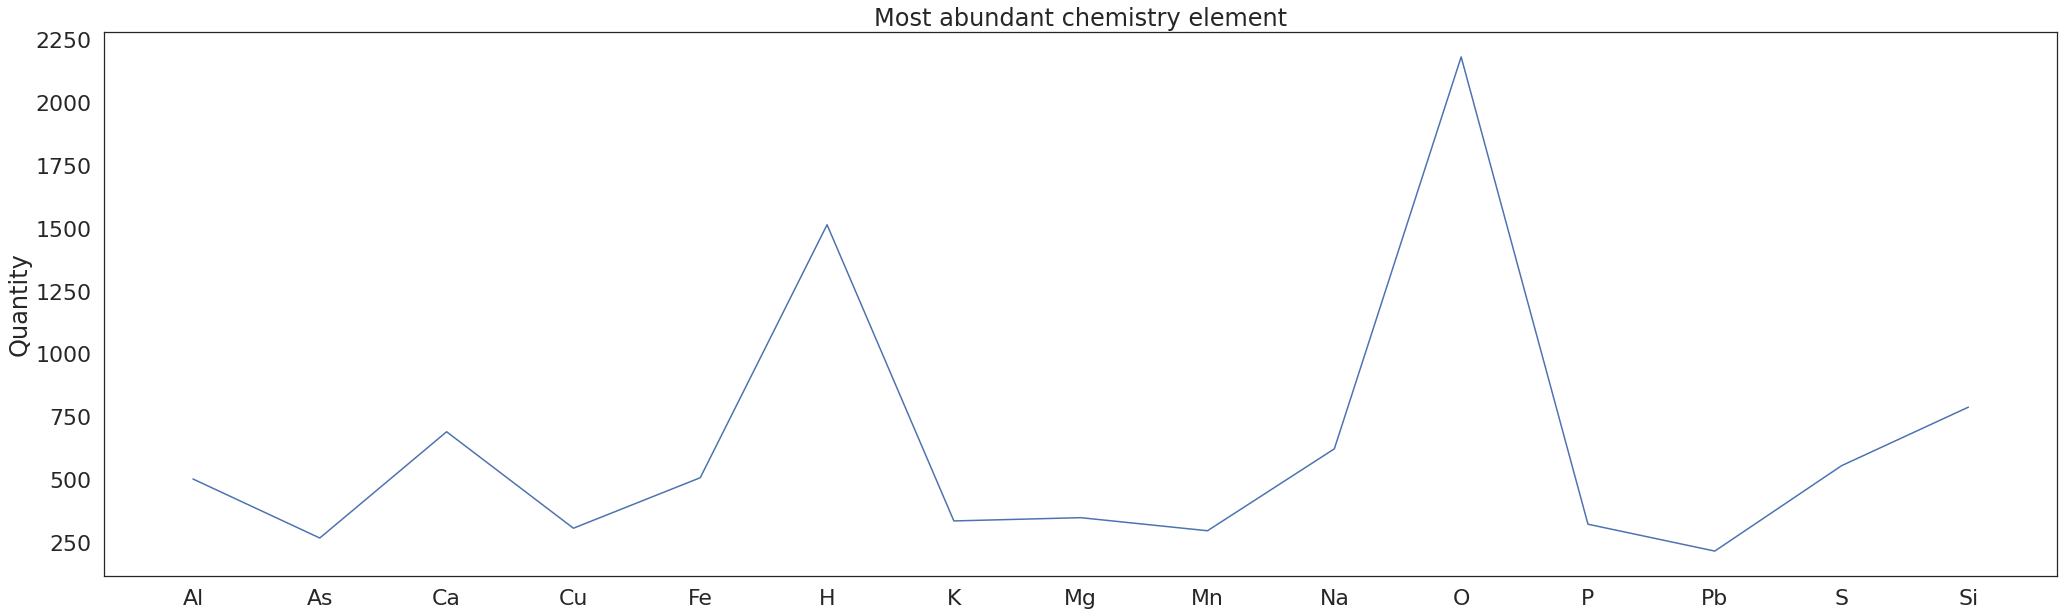

3. Oldests minerals:
    * **Tochilinite (meteorite)**: 4.7 (Ma)
    * **Machiite (meteorite)**: 4.7 (Ma) 
    * **Troilite (meteorite)**: 4.7 (Ma)

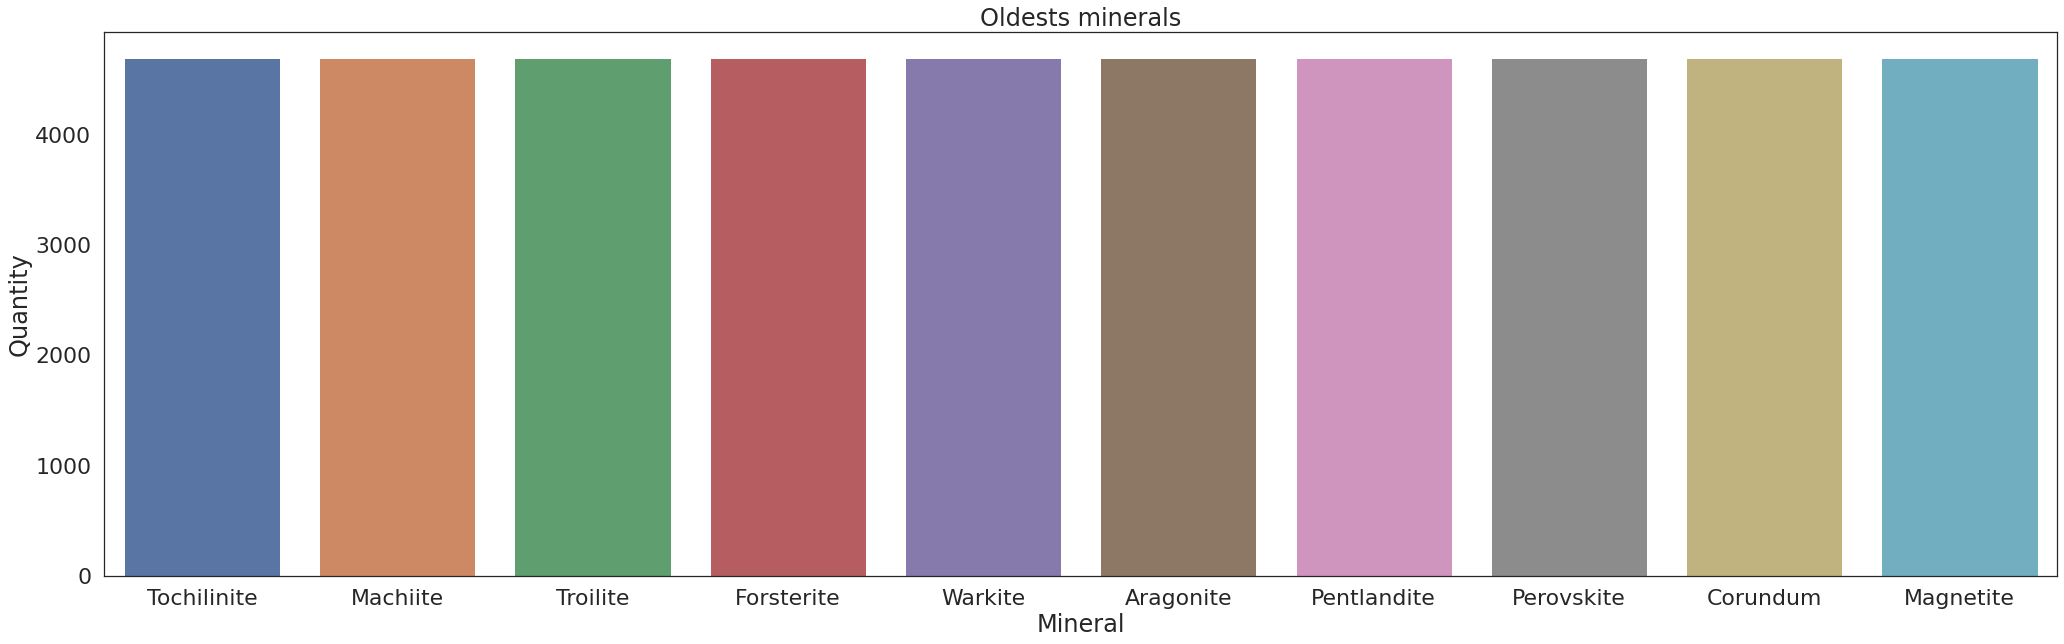

# Table of Contents

1. [Mission](#mission)
1. [Data description](#datadescription)
    1. [Reading data](#load)
1. [Missing data](#missingvalues)
    1. [Solution](#missingsolution)
1. [Fixing data](#fixing)
    1. [Country](#colcountry)
    1. [Elements](#colelements)
    1. [Age (Ma)](#colage) 
1. [Data plot](#plots)
    1. [Country](#plotcountry)
    1. [Elements](#plotelement)
    1. [Age (Ma)](#plotage) 
1. [Results](#results)
    1. [Minerals provided by different countries](#mineralscountry)
    1. [Most abundant elements](#elementabundant)
    1. [Oldest mineral](#oldestmineral) 
1. [References](#references)



********

# **MISSION**<a id="mission" ></a><br>

1. Find which minerals are provided by different countries.
2. Find the most abundant chemistry element.
3. Find the oldest mineral.


********

# **DATA DESCRIPTION**<a id="datadescription" ></a><br>

> * **Mineral Name**: common name (Abswurmbachite, Achalaite, Ferrihydrite, Langite, Silver, Gold, Cooper, etc.)
> * **RRUFF Chemistry**: RRUFF chemical formula (Cu2+Mn3+6O8(SiO4), Fe2+Ti4+Nb5+2O8, etc.)
> * **IMA Chemistry**: IMA chemical formula (Cu2+Mn3+6O8(SiO4), Fe2+TiNb2O8, etc.)
> * **Chemistry Elements**: chemistry elements in mineral assembly (Cu: cooper, Mn: manganese, O: oxygen, Si: silicon, etc.)
> * **IMA Number**: IMA identification number (if applies) (IMA1990-007, IMA2013-103, etc.)
> * **RRUFF IDs**: RRUFF id (if applies) (R070578 R080016, R070037, etc.)
> * **Country of Type** Locality: country of type locality (site of first official geological description) (Greece, 'unknown', '?', etc.)
> * **Year First Published**: year of the first official geological description (2014, etc.)
> * **IMA Status: official** status of IMA assignment (Approved, Grandfathered, Pending publication, Renamed, etc.)
> * **Structural Groupname**: mineral structural group (Sapphirine, etc.)
> * **Fleischers Groupname**: Fleischers mineral structural group (autunite, etc.)
> * **Status Notes**: references ((McDonald A M, Chao G Y, Grice J D (1994)), etc.)
> * **Crystal Systems**: group of lattice system (triclinic, hexagonal, etc.)
> * **Oldest Known Age (Ma)**: age of minerals (Ma = million years) (370, 56, etc.)

********

# Reading data<a id="load" ></a><br>

In [ ]:
# Visualizations on notebook
%matplotlib inline

# Python imports
import os, math, time, random

# Data manipulation
import numpy as np # Linear algebra
import pandas as pd # Data processing


# Data visualization
import matplotlib.pyplot as plt
import geopandas as gpd # Geospatial visualization
import missingno # Missing data visualization
import seaborn as sns # Data visualization
sns.set()

# Text manipulation
import chardet
import fuzzywuzzy
import regex
from pandas_profiling import ProfileReport # Report generator

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
minerals = pd.read_csv('/kaggle/input/ima-database-of-mineral-properties/RRUFF_Export_20191025_022204.csv')

minerals.head()

In [ ]:
minerals.tail()

In [ ]:
minerals.shape

In [ ]:
minerals.info()

In [ ]:
def unique_val(column, data):
    unique_values = data[column].unique()
    return unique_values

unique_val('Country of Type Locality', minerals)

********

# **MISSING DATA**<a id="missingvalues" ></a><br>



In [ ]:
missingno.matrix(minerals, figsize=(35,15))

In [ ]:
minerals_values_count = minerals.isnull().sum()

minerals_values_count

* **IMA Number**: not important for solution
* **RRUFF IDs**: not important for solution
* **IMA Chemistry**: important for solution
* **Country of Type Locality**: important for solution
* **Oldest Known Age (Ma)**: important for solution

********

# Solution<a id="missingsolution" ></a><br>

1. Country
   * Fill NaN's Country with Unknown
   * Strip, split and rename countries
   
   
2. Elements
   * Remove NaN values in Elements
   * Separate each chemistry element
   
   
3. Age
   * Fill NaN's Age with Unknown
   
   
* Find duplicates
* Rename columns


********

# **FIXING DATA**<a id="fixing" ></a><br>

**Duplicates**

In [ ]:
dupli = minerals.duplicated()
minerals[dupli].shape

**Columns rename**

In [ ]:
minerals.rename(columns={'Mineral Name': 'Mineral', 'RRUFF Chemistry (plain)': 'RRUFF Chem', 'IMA Chemistry (plain)': 'IMA Chem',
                         'Chemistry Elements': 'Elements', 'IMA Number': 'IMA ID', 'RRUFF IDs': 'RRUFF ID', 
                         'Country of Type Locality': 'Country', 'Oldest Known Age (Ma)': 'Age (Ma)'}, inplace=True)
print('Done')

********

# Country<a id="colcountry" ></a><br>

**Changing NaN to unknown**

In [ ]:
minerals['Country'] = minerals['Country'].fillna(value='Unknown') #  Changing the NaN values to unknown

minerals['Country'].isnull().sum()

**Spliting, striping and renaming countries**

In [ ]:
# Edited from Daria Chemkaeva, (2020).

countries_splited = minerals.set_index('Mineral')['Country'].str.split(' / ', expand=True).stack().reset_index('Mineral').reset_index(drop=True)
countries_splited.columns = ['Mineral', 'Country']

new_met = countries_splited['Country'].str.contains('meteorite', case=False), 'Country'
new_cou = countries_splited['Country'].str.contains('IDP', case=False), 'Country'

countries_splited.loc[new_met] = 'Meteorite'
countries_splited.loc[new_cou] = 'IDP'
countries_splited['Country'] = countries_splited['Country'].replace({' \?':''}, regex=True)
countries_splited['Country'] = countries_splited['Country'].replace('?', 'Unknown')

print(countries_splited[countries_splited['Country'].str.contains('Unknown', regex=False)])

countries_splited

**Percent of data missing**

In [ ]:
missing_values_count = countries_splited[countries_splited['Country'].str.contains('Unknown', regex=False)].value_counts()
total_cells = np.product(minerals['Country'].shape)
total_missing = missing_values_count.sum()
percent_missing_country = (total_missing/total_cells) * 100
print(percent_missing_country)

**Geting uniques values from Country**

In [ ]:
countries_splited['Country'].value_counts()

**Dropping Unknown rows from countries_splited**

In [ ]:
countries_splited.drop(countries_splited[countries_splited['Country'] == 'Unknown'].index, inplace=True)

countries_splited

********

# Elements<a id="colelements" ></a><br>

**Displaying rows with NaN values**

In [ ]:
null_elements = minerals['Elements'].isnull()
minerals[null_elements]

In [ ]:
missing_values_count = minerals['Elements'].isnull().sum()
total_cells = np.product(minerals['Elements'].shape)
total_missing = missing_values_count.sum()
percent_missing_elems = (total_missing/total_cells) * 100
print(percent_missing_elems)

**Removing NaN-bearing rows**

 

In [ ]:
del_rows = minerals['Elements'].notna()
minerals = minerals[del_rows] #  New DF without the 4 NaN rows

minerals['Elements'].isna().sum()

**Spliting chemistry elements**

In [ ]:
# Edited from Daria Chemkaeva, (2020).

elements_splited = minerals.set_index('Mineral')['Elements'].str.split(' ', expand=True).stack().reset_index('Mineral').reset_index(drop=True)
elements_splited.columns = ['Mineral', 'Element']

elements_splited

********

# Age (Ma)<a id="colage" ></a><br>



**Checking unique values**

In [ ]:
minerals['Age (Ma)'].unique()

**Changing type to float**

In [ ]:
minerals['Age (Ma)'] = minerals['Age (Ma)'].astype('float64')
print('Done')

**Filling NaNs with Unknown**

In [ ]:
minerals['Age (Ma)'] = minerals['Age (Ma)'].replace(0, 'Unknown')

minerals['Age (Ma)']

In [ ]:
minerals['Age (Ma)'] = minerals['Age (Ma)'].fillna(value='Unknown') #  Changing the NaN values to unknown

minerals['Age (Ma)']

In [ ]:
minerals['Age (Ma)'].isna().sum()

missing_values_count = minerals['Age (Ma)'].str.contains('Unknown', regex=False).value_counts()
total_cells = np.product(minerals['Age (Ma)'].shape)
total_missing = missing_values_count.sum()
percent_missing_age = (total_missing/total_cells) * 100
print('Number of missing cells: ', missing_values_count[:1])
print('% = ', percent_missing_age)

In [ ]:
minerals['Age (Ma)'].value_counts()[0:25]

**Removing 1067 (18.6%) Age missing cells**

In [ ]:
age_removed = minerals[minerals['Age (Ma)'] != 'Unknown']
                                         
age_removed['Age (Ma)'].value_counts().sort_index(ascending=False)

**Creating a new dataframe for ploting**

In [ ]:
oldest_mine = age_removed.groupby('Mineral')[['Country', 'Age (Ma)']].max()

oldest_mine = oldest_mine.sort_values(by='Age (Ma)', ascending=False)[0:10]

oldest_min_notna = oldest_mine[~oldest_mine['Country'].str.contains('unknown')]

oldest_min_notna

********

# **DATA PLOT**<a id="plots" ></a><br>

# Country<a id="plotcountry" ></a><br>


In [ ]:
plt.figure(figsize=(40,10))
plt.title("Quantity of minerals per country")
sns.barplot(x=countries_splited['Country'].value_counts()[0:10].index, y=countries_splited['Country'].value_counts()[0:10])
plt.ylabel("Amount of minerals")
plt.xlabel("Countries", labelpad=14)

In [ ]:
countries_splited['Country'].value_counts()[0:10]

********

# Elements<a id="plotelement" ></a><br>

Merging countries_splited and elements_splited

In [ ]:
countries_splited['Country'].value_counts()

In [ ]:
elements_splited['Element'].value_counts()

In [ ]:
filtro_1 = countries_splited['Country'].map(countries_splited['Country'].value_counts()) >= 200
elem_1 = countries_splited[filtro_1]

filtro_2 = elements_splited['Element'].map(elements_splited['Element'].value_counts()) >= 500
elem_2 = elements_splited[filtro_2]

plot_country_elem = pd.merge(elem_1, elem_2, on='Mineral')

plot_country_elem

In [ ]:
plt.figure(figsize=(30,5))
plt.title("Most abundant chemistry element")
sns.lineplot(data=plot_country_elem.Element.value_counts())
plt.ylabel("Quantity")
plot_country_elem.Element.value_counts()

In [ ]:
# Edited from Daria Chemkaeva, (2020).

sns.catplot(x="Country", hue="Element", kind="count", palette="colorblind", edgecolor=".01", data=plot_country_elem, height=9, aspect=2)

********

# Age<a id="plotage" ></a><br>

In [ ]:
oldest_min = age_removed.groupby('Mineral')[['Country', 'Age (Ma)']].max()

oldest_min = oldest_min.sort_values(by='Age (Ma)', ascending=False)

oldest_min_notna = oldest_min[~oldest_min['Country'].str.contains('unknown')]

oldest_min_notna[0:10]

In [ ]:
plt.figure(figsize=(35,6))
plt.title("Oldests minerals")
sns.barplot(x=oldest_min_notna[0:10].index, y=oldest_min_notna['Age (Ma)'][0:10])
plt.ylabel("Quantity")

In [ ]:
plt.figure(figsize=(35,5))
plt.title("Countries with the oldest minerals")
sns.barplot(x=oldest_min_notna['Country'][0:10], y=oldest_min_notna['Age (Ma)'])
plt.ylabel("Age (Ma)")

In [ ]:
age_group = oldest_min_notna.groupby('Mineral')[['Country', 'Age (Ma)']].max()
x = age_group.groupby(['Age (Ma)', 'Country'])['Age (Ma)'].unique()        #.apply(lambda df: df['Age (Ma)']).sort_values()
x.sort_values(ascending=False)


********

# **RESULTS**<a id="results" ></a><br>

# 1. Minerals provided by different countries.<a id="mineralscountry" ></a><br>


In [ ]:
sns.set(font_scale=2)
sns.set_style("white")
plt.figure(figsize=(35,10))
plt.title("Quantity of minerals per country")
sns.barplot(x=countries_splited['Country'].value_counts()[0:10].index, y=countries_splited['Country'].value_counts()[0:10])
plt.ylabel("Amount of minerals")
plt.xlabel("Countries", labelpad=14)
countries_splited['Country'].value_counts()[0:10]

**Mineras provided by countries**
1. **United States of America**: 825 minerals.
2. **Russia**: 803 minerals.
3. **Italy**: 370 minerals.

********

# 2. Most abundant chemistry element.<a id="elementabundant" ></a><br>

In [ ]:
filtro_1 = countries_splited['Country'].map(countries_splited['Country'].value_counts()) >= 200
elem_1 = countries_splited[filtro_1]

filtro_2 = elements_splited['Element'].map(elements_splited['Element'].value_counts()) >= 500
elem_2 = elements_splited[filtro_2]

sns.set(font_scale=2)
sns.set_style("white")
plot_country_elem = pd.merge(elem_1, elem_2, on='Mineral')

sns.catplot(x="Country", hue="Element", kind="count", palette="colorblind", edgecolor=".01", data=plot_country_elem, height=9, aspect=3)

**United States of America has more elements, since they are the country with more minerals**

In [ ]:
sns.set(font_scale=2)
sns.set_style("white")
plt.figure(figsize=(35,10))
plt.title("Most abundant chemistry element")
sns.lineplot(data=plot_country_elem.Element.value_counts())
plt.ylabel("Quantity")

plot_country_elem.Element.value_counts()

**The most abundant element in the data is Oxygen**

****

# 3. Oldest mineral.<a id="oldestmineral" ></a><br>

In [ ]:
sns.set(font_scale=2)
sns.set_style("white")
plt.figure(figsize=(35,10))
plt.title("Oldests minerals")
sns.barplot(x=oldest_min_notna[0:10].index, y=oldest_min_notna['Age (Ma)'][0:10])
plt.ylabel("Quantity")


**This are the oldest minerals in the data, with an age of 4.7 Ma:**
1. **Tochilinite**
2. **Machiite**
3. **Troilite**
4. **Forsterite**
5. **Warkite**
6. **Aragonite**
7. **Pentlandite**
8. **Perovskite**
9. **Corundum**
10. **Magnetite**

In [ ]:
sns.set(font_scale=2)
plt.figure(figsize=(35,15))
plt.title("Countries with the oldest minerals")
sns.barplot(x=oldest_min_notna['Country'][0:5], y=oldest_min_notna['Age (Ma)'])
plt.ylabel("Age (Ma)")

**Countries having the oldest minerals in the data:**

1. **Russia**
2. **Australia**
3. **Italy (Meteorite)**
4. **Italy**
5. **Australia (Meteorite)/ Italy (Meteorite)**

In [ ]:
sns.set(font_scale=2)
plt.figure(figsize=(35,15))
plt.title("Most abundant age")
sns.lineplot(data=oldest_min_notna['Age (Ma)'].value_counts())
plt.ylabel("Quantity")

oldest_min_notna['Age (Ma)'].value_counts(ascending=False)

In [ ]:
sns.set(font_scale=2)
sns.set_style("white")
plt.figure(figsize=(35,15))
sns.distplot(a=oldest_min_notna['Age (Ma)'], kde=True)
plt.title("Histogram of Age (Ma)")
plt.legend()

**The Age (Ma) values spread from 0<x<4700 Ma. Most of the values are between 0 and 600 Ma.**

In [ ]:
sns.set_style(style="white")
rs = np.random.RandomState(5000)
new_data = pd.DataFrame(data=rs.normal(size=(200, 14)), columns=list(minerals.columns))
corr = new_data.corr()
matrix = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(7, 10))
cmap = sns.diverging_palette(10, 190, as_cmap=True)
sns.heatmap(corr, mask=matrix, cmap=cmap, vmax=.2, center=0, square=True, cbar_kws={"shrink": .55})



# **FURTHER IMPROVEMENTS**

*  **Fix Age (Ma). Some minerals ages (more than 130) indicate the extraterrestrial origin (meteorites) but the country does not. Earth is 4550 Ma. Ages >4550 Ma indicate that the mineral was contained on a meteorite.**

****

******** 

# **PROFILE REPORT**<a id="report" ></a><br>

In [ ]:
rep = ProfileReport(minerals)
rep.to_file(output_file='report.html')

In [ ]:
rep

# **REFERENCES**<a id="references" ></a><br>

* **Thorough EDA with a single line, pandas profiling**: https://www.kaggle.com/frtgnn/thorough-eda-with-a-single-line-pandas-profiling/
* **Guide for Comprehensive Data Exploration in Python**: https://www.kaggle.com/vikumsw/guide-for-comprehensive-data-exploration-in-python#Table-Of-Contents
* **Comprehensive data exploration with Python**: https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
* **Daria Chemkaeva**: https://www.kaggle.com/lsind18